In [1]:
#import necessary librarys
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier #if regression then regressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns 
#RedWine Quality Prediction

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
#checking the columns of datset
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
#checking the null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#checking for  unique values
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
#checking the number of unique values in the variable
df['quality'].nunique()

6

# Exploratort Data Analysis

In [11]:
df.isnull().sum() #checking missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Visualization of the data

In [13]:
df_visualization_nominal=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']].copy()

In [14]:
df_visualization_nominal.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


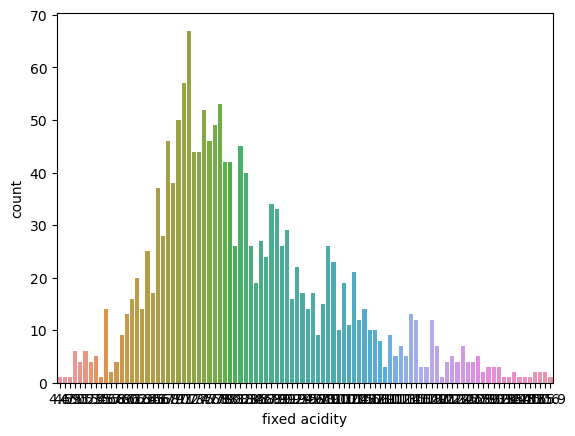

In [15]:
ax = sns.countplot(x="fixed acidity",data=df_visualization_nominal)
print(df_visualization_nominal["fixed acidity"].value_counts())

0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


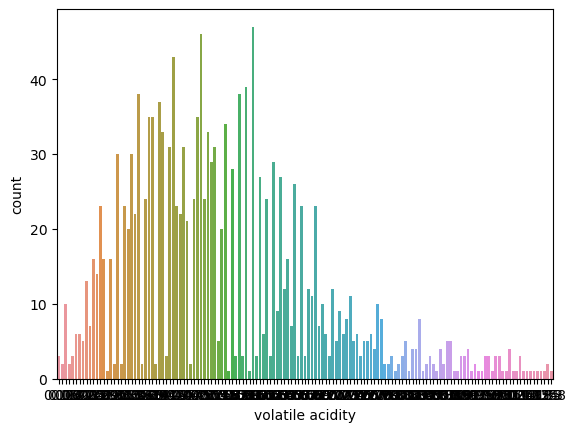

In [16]:
bx = sns.countplot(x="volatile acidity", data=df_visualization_nominal)
print(df_visualization_nominal["volatile acidity"].value_counts())

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


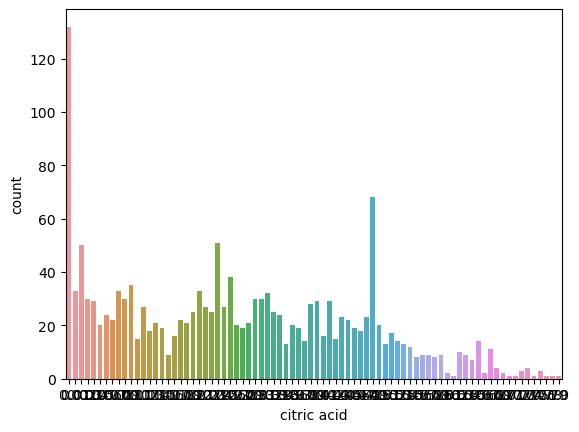

In [17]:
cx = sns.countplot(x="citric acid", data=df_visualization_nominal)
print(df_visualization_nominal["citric acid"].value_counts())

2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


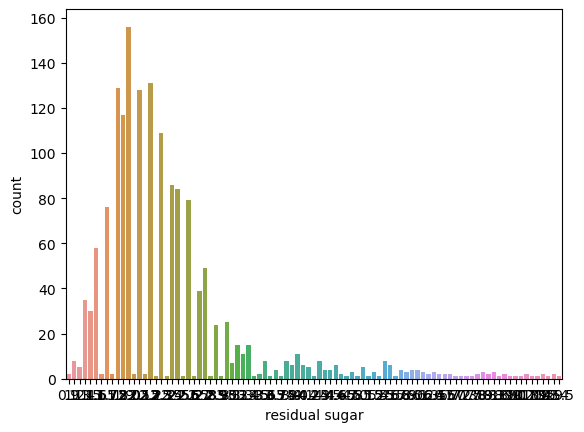

In [18]:
dx=sns.countplot(x="residual sugar",data=df_visualization_nominal)
print(df_visualization_nominal["residual sugar"].value_counts())

0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


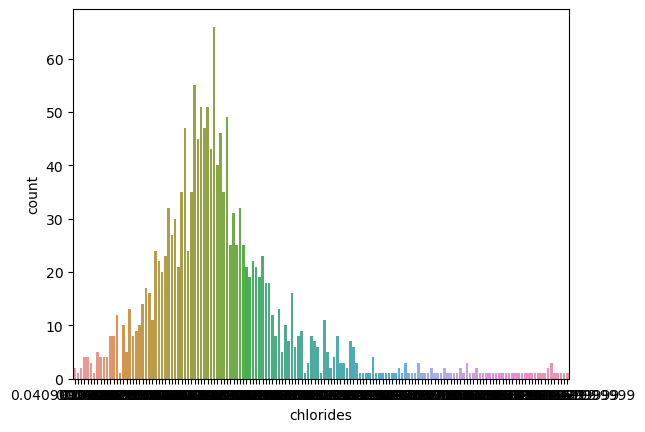

In [19]:
dx = sns.countplot(x="chlorides", data=df_visualization_nominal)
print(df_visualization_nominal["chlorides"].value_counts())

6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
13.0     57
8.0      56
14.0     50
3.0      49
18.0     46
4.0      41
21.0     41
19.0     39
24.0     34
26.0     32
23.0     32
20.0     30
27.0     29
25.0     24
29.0     23
28.0     23
22.0     22
32.0     22
31.0     20
34.0     18
30.0     16
35.0     15
36.0     11
33.0     11
38.0      9
41.0      7
40.0      6
39.0      5
48.0      4
51.0      4
45.0      3
1.0       3
43.0      3
42.0      3
52.0      3
37.0      3
68.0      2
55.0      2
50.0      2
37.5      2
53.0      1
72.0      1
57.0      1
47.0      1
5.5       1
2.0       1
46.0      1
54.0      1
40.5      1
66.0      1
Name: free sulfur dioxide, dtype: int64


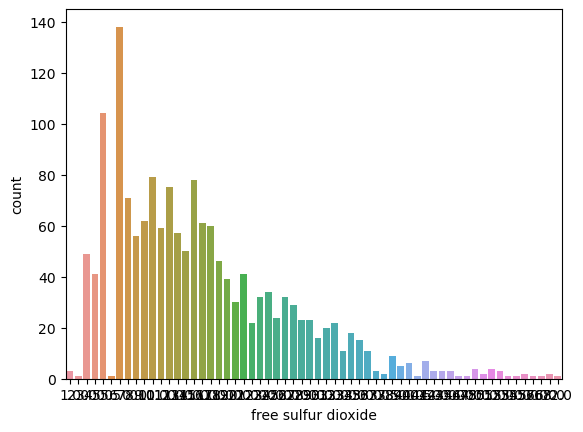

In [20]:
ex = sns.countplot(x="free sulfur dioxide", data=df_visualization_nominal)
print(df_visualization_nominal["free sulfur dioxide"].value_counts())

28.0     43
24.0     36
15.0     35
18.0     35
23.0     34
         ..
139.0     1
149.0     1
152.0     1
155.0     1
165.0     1
Name: total sulfur dioxide, Length: 144, dtype: int64


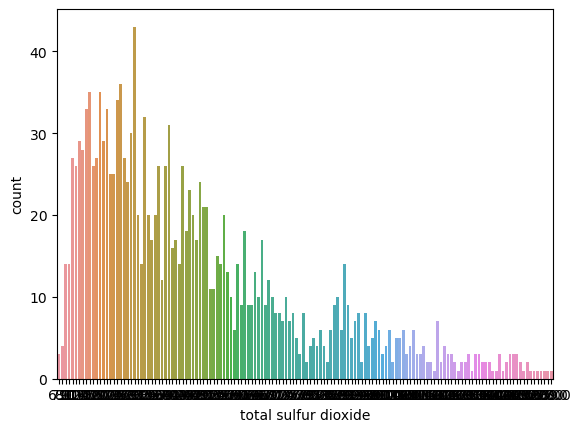

In [21]:
fx = sns.countplot(x="total sulfur dioxide", data=df_visualization_nominal)
print(df_visualization_nominal["total sulfur dioxide"].value_counts())

0.99720    36
0.99680    35
0.99760    35
0.99800    29
0.99620    28
           ..
0.99684     1
0.99764     1
0.99473     1
0.99320     1
0.99651     1
Name: density, Length: 436, dtype: int64


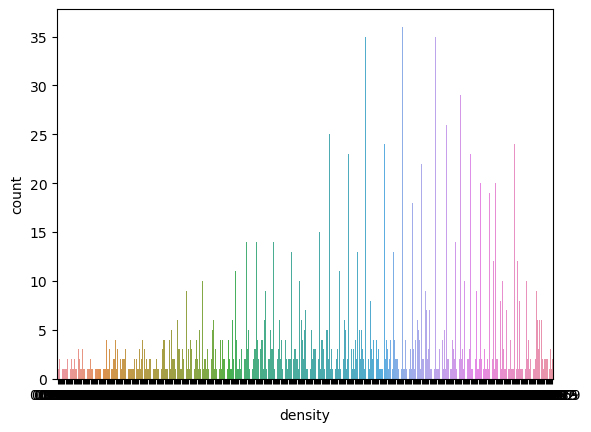

In [22]:
gx = sns.countplot(x="density",data=df_visualization_nominal)
print(df_visualization_nominal["density"].value_counts())

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: pH, Length: 89, dtype: int64


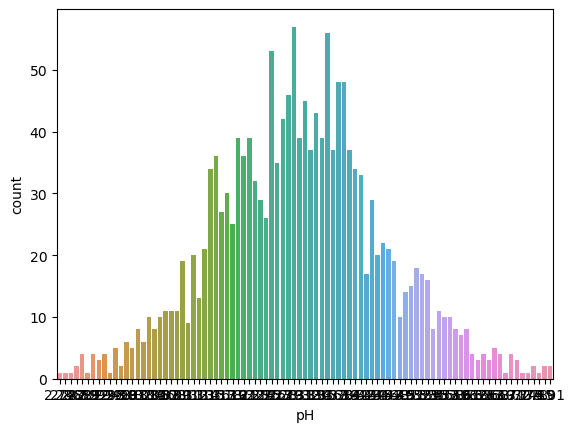

In [23]:
hx = sns.countplot(x="pH", data=df_visualization_nominal)
print(df_visualization_nominal["pH"].value_counts())

0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
        ..
1.00     1
1.59     1
0.33     1
1.26     1
1.01     1
Name: sulphates, Length: 96, dtype: int64


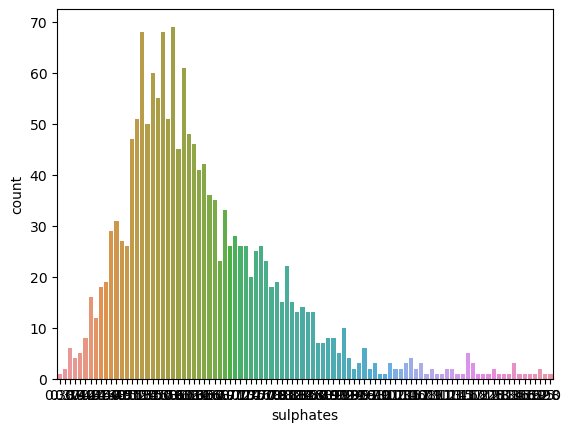

In [24]:
ix = sns.countplot(x="sulphates", data=df_visualization_nominal)
print(df_visualization_nominal["sulphates"].value_counts())

9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: alcohol, Length: 65, dtype: int64


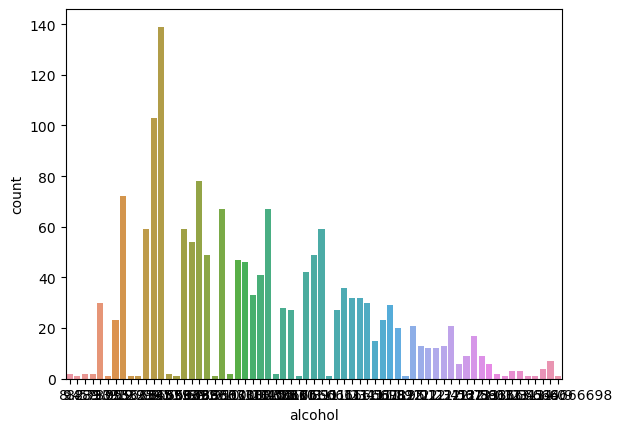

In [25]:
jx = sns.countplot(x="alcohol", data=df_visualization_nominal)
print(df_visualization_nominal["alcohol"].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


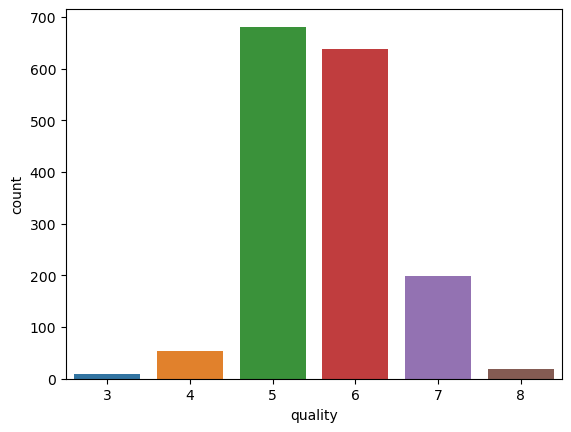

In [26]:
kx = sns.countplot(x="quality", data=df_visualization_nominal)
print(df_visualization_nominal["quality"].value_counts())

# importing matplot library and analysing the data with heatmap

<AxesSubplot:>

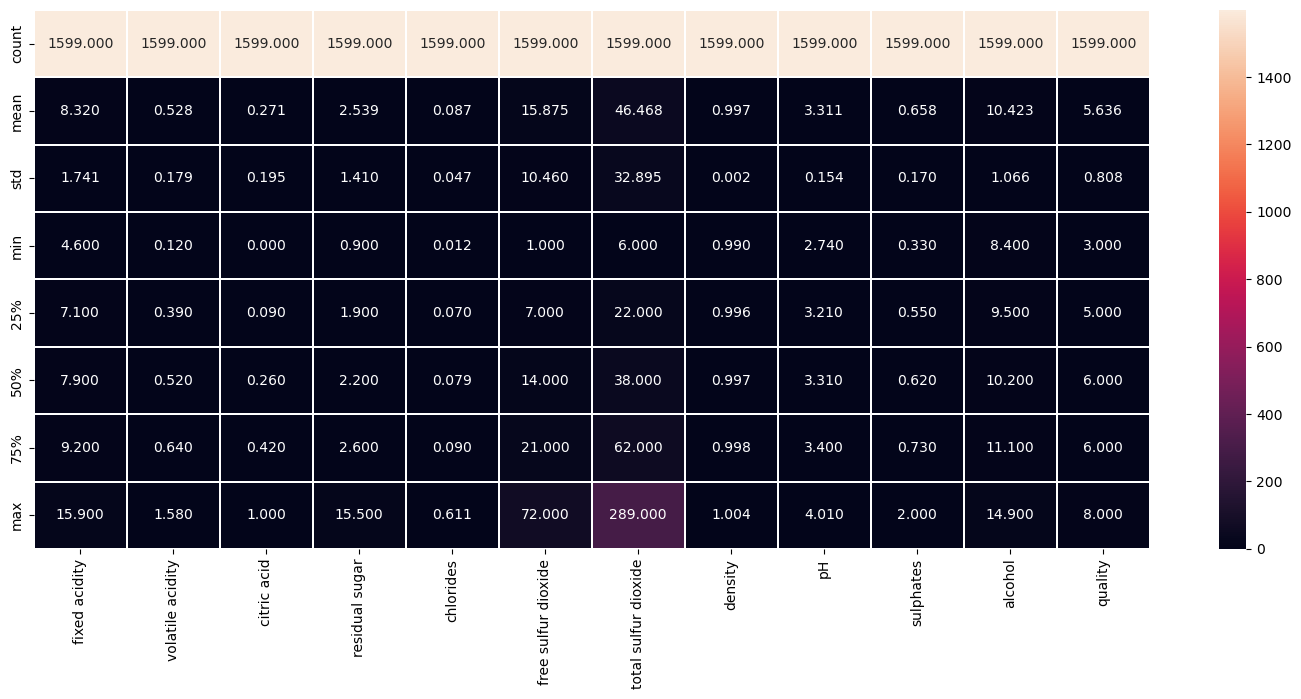

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,7))
sns.heatmap(df.describe(), linewidths=0.2, annot=True,linecolor="white", fmt="0.3f")

# Checking the correlation :

In [28]:
df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [29]:
#Observations :
    #1. Co-relation between target variable quality and fixed acidity is 0.124052
    #2. Co-relation between target variable quality and volatile acidity is -0.390558
    #3. Co-relation between target variable quality and citric acid is 0.226373
    #4. Co-relation between target variable quality and residual sugar is 0.013732
    #5. Co-relation between target variable quality and chlorides is -0.128907
    #6. Co-relation between target variable quality and free sulfur dioxide is -0.050656
    #7. Co-relation between target variable quality and total sulfur dioxide is -0.185100
    #8. Co-relation between target variable quality and density is -0.174919
    #9. Co-relation between target variable quality and pH is -0.057731
    #10.Co-relation between target variable quality and sulphates is 0.251397
    #11.Co-relation between target variable quality and alcohol is 0.476166

<AxesSubplot:>

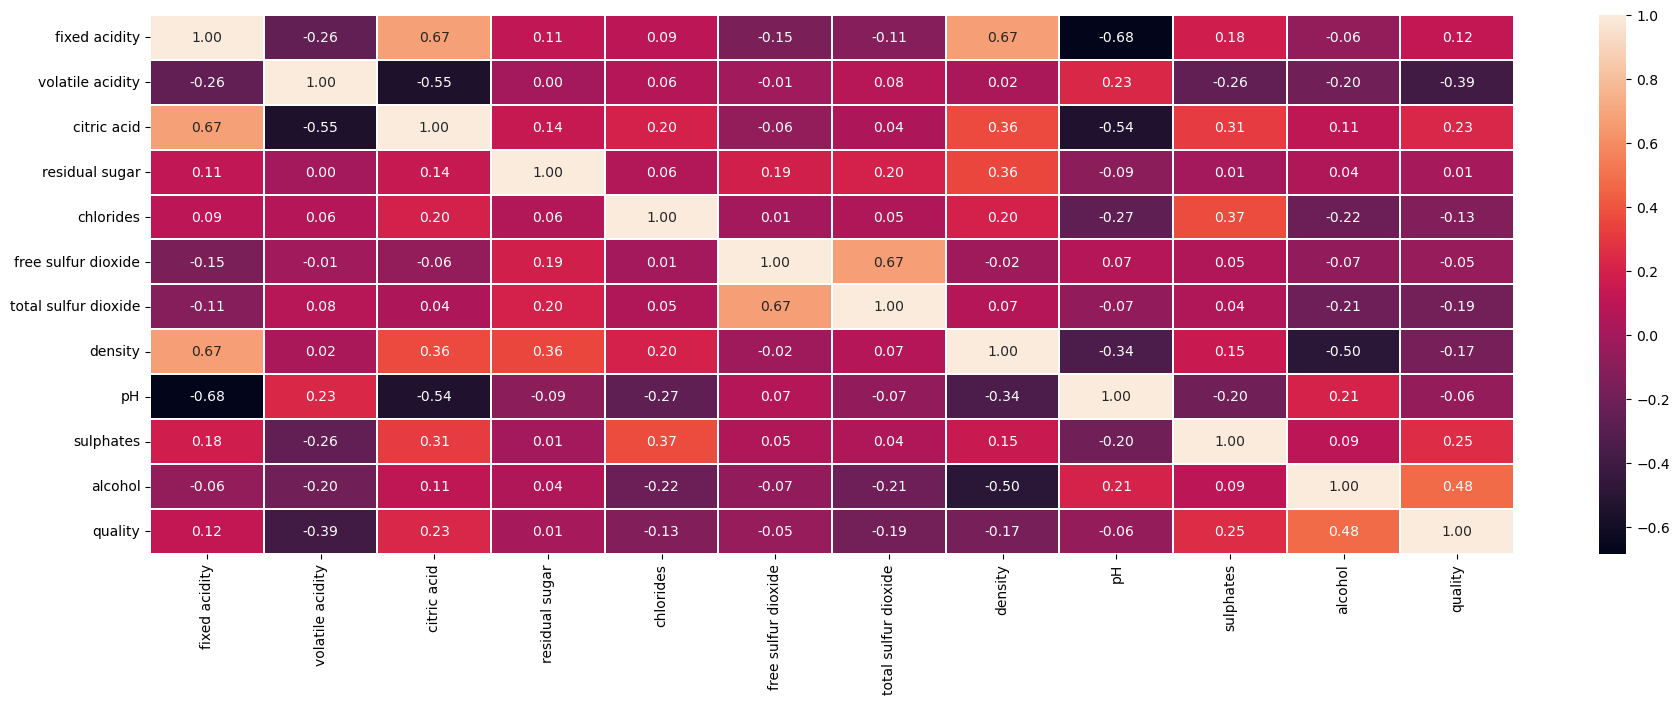

In [30]:
#Using heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(), linewidths=0.1, annot=True,linecolor="white", fmt="0.2f")

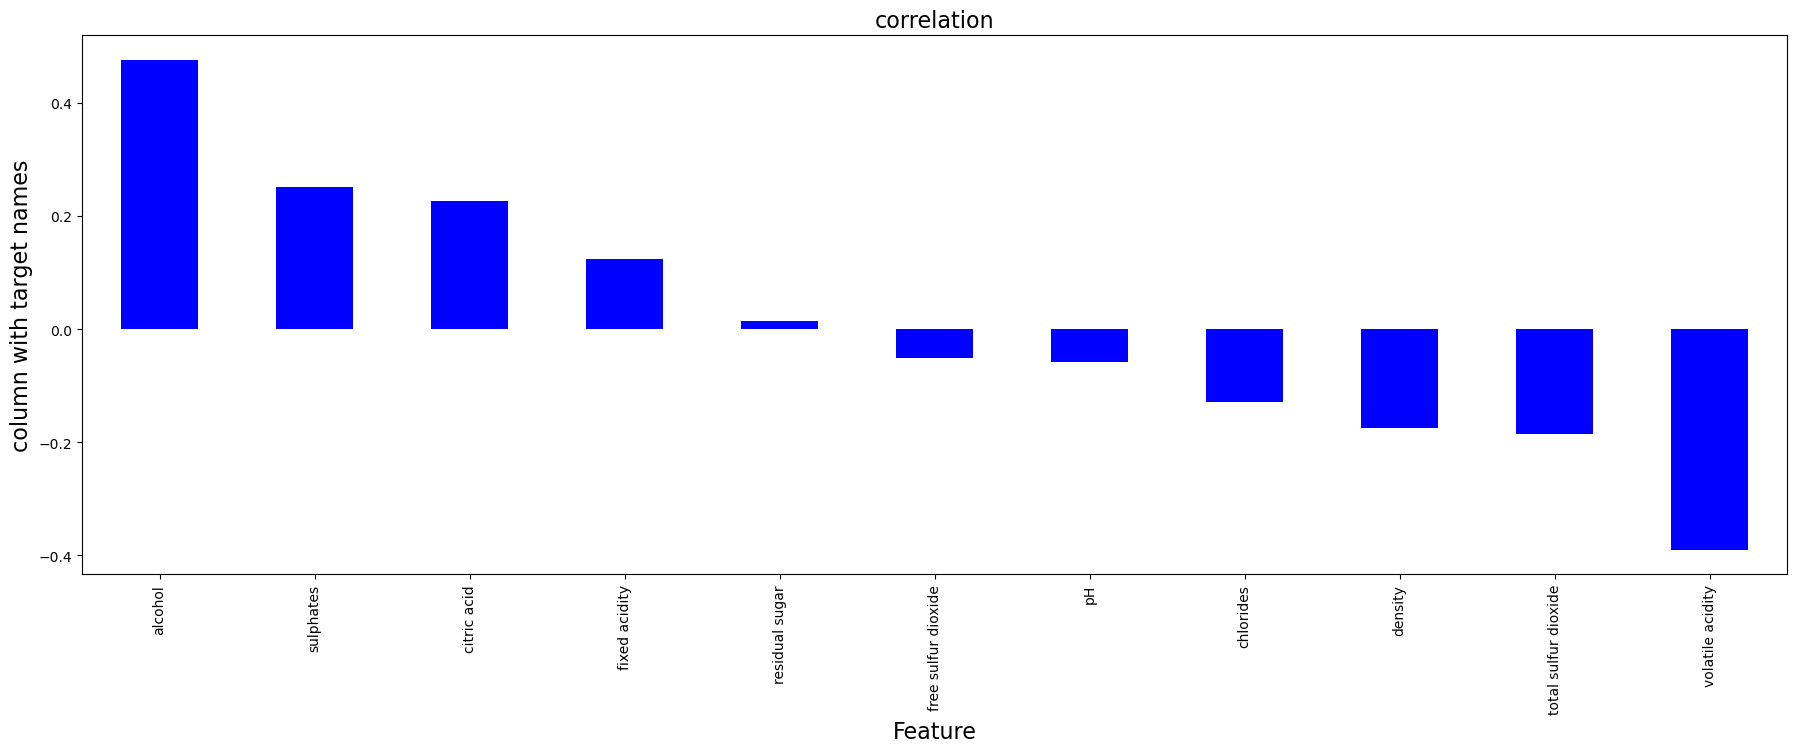

In [31]:
#Checking which are positively and negatively correlated with the target column
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=16)
plt.ylabel('column with target names',fontsize=16)
plt.title('correlation',fontsize=16)
plt.show()

# Checking the skewness

In [32]:
#Checking the skewness in the dataset
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

# Checking for Outliers

In [33]:
#checking the datatype
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

<AxesSubplot:>

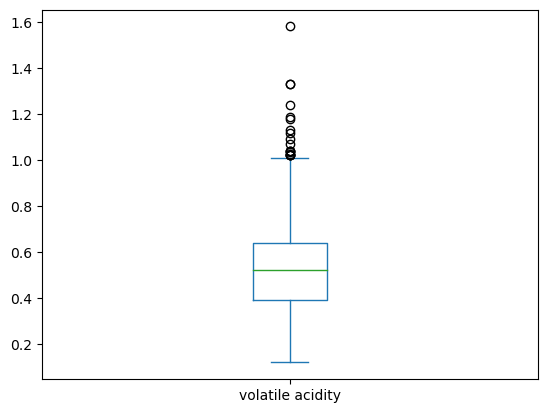

In [34]:
#using boxplot
df['volatile acidity'].plot.box()

<AxesSubplot:>

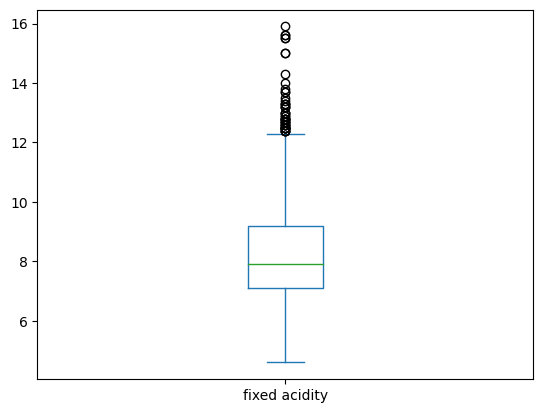

In [35]:
df['fixed acidity'].plot.box()

<AxesSubplot:>

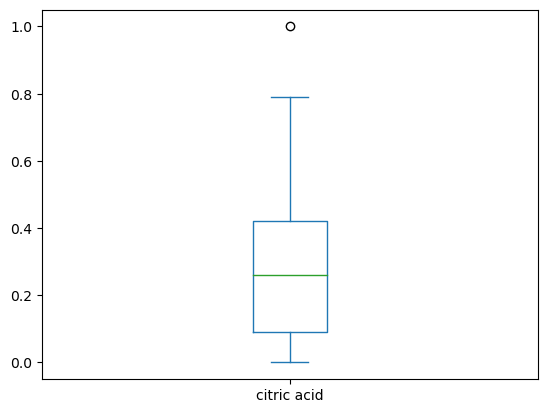

In [36]:
df['citric acid'].plot.box()

<AxesSubplot:>

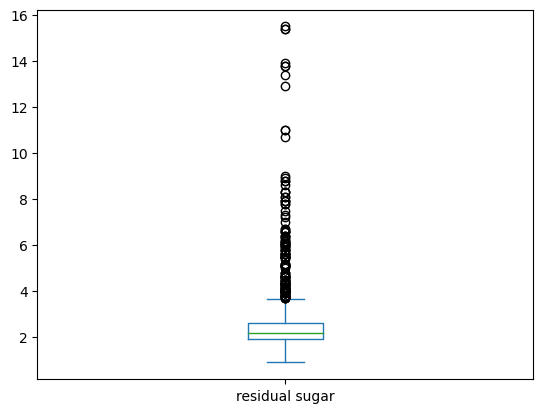

In [37]:
df['residual sugar'].plot.box()

<AxesSubplot:>

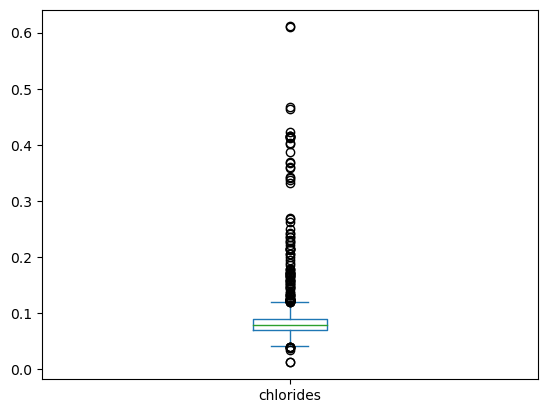

In [38]:
df['chlorides'].plot.box()

<AxesSubplot:>

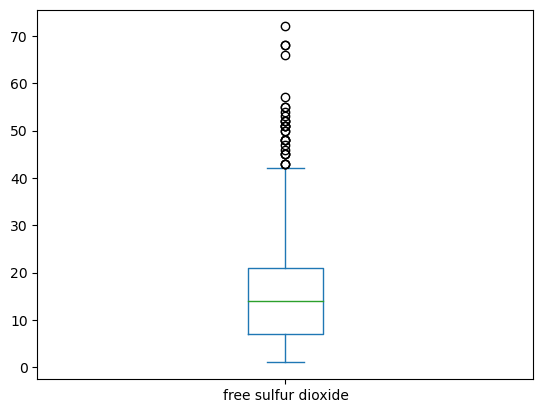

In [39]:
df['free sulfur dioxide'].plot.box()

<AxesSubplot:>

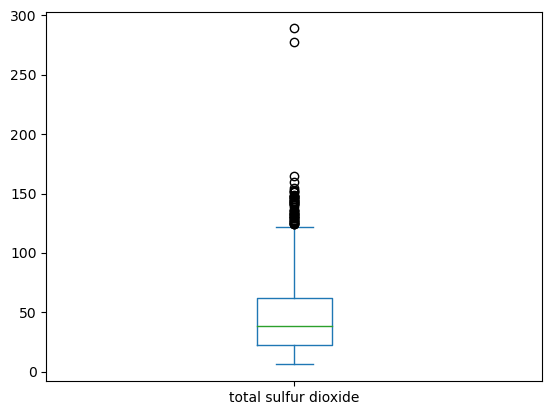

In [40]:
df['total sulfur dioxide'].plot.box()

<AxesSubplot:>

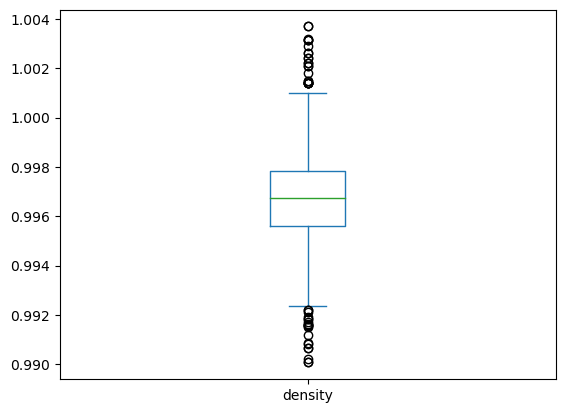

In [41]:
df['density'].plot.box()

<AxesSubplot:>

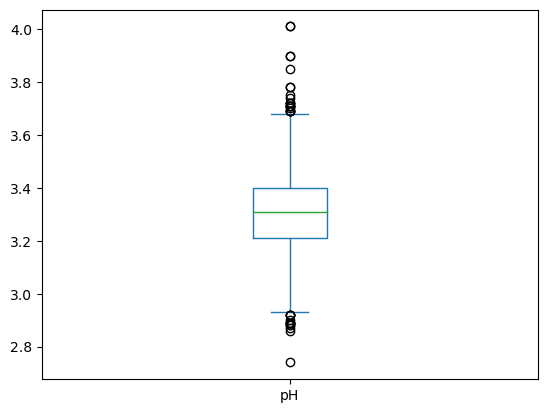

In [42]:
df['pH'].plot.box()

<AxesSubplot:>

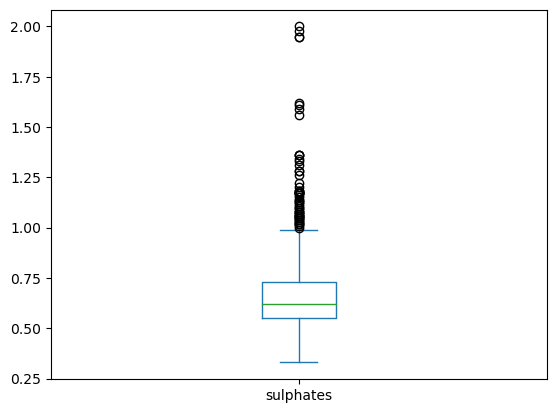

In [43]:
df['sulphates'].plot.box()

<AxesSubplot:>

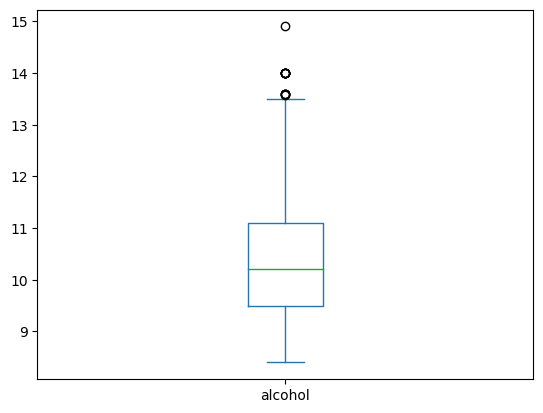

In [44]:
df['alcohol'].plot.box()

<AxesSubplot:>

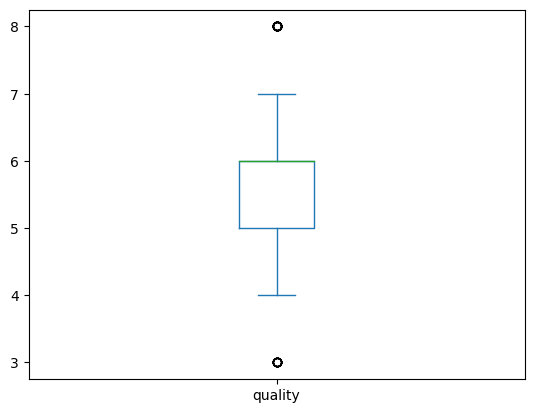

In [45]:
df['quality'].plot.box()

# Considering the outlier removal

In [46]:
#checking the shape
df.shape

(1599, 12)

In [47]:
#importing required libraries to calculate zscore
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
         555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
         639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
         690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
         821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
         982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1260, 1269, 1269, 

In [48]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [49]:
df_new_z.shape

(1451, 12)

# Percentage loss of data

In [50]:
Data_loss=((1599-1451)/1599)*100
Data_loss

9.255784865540964

# Separating the columns into features and target

In [51]:
features=df.drop("quality",axis=1)
target=df["quality"]

# Scaling the data by Min Max Scaler

In [52]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [53]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target, test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:-{r2_score(target_train,pred_train)}")
    print(f"At random state {i},the training accuracy is:-{r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:-0.3654519616206866
At random state 0,the training accuracy is:-0.32838876395801997


At random state 1,the training accuracy is:-0.3655849921479044
At random state 1,the training accuracy is:-0.3266402726986819


At random state 2,the training accuracy is:-0.3707977009866663
At random state 2,the training accuracy is:-0.302438869739154


At random state 3,the training accuracy is:-0.3530297271672961
At random state 3,the training accuracy is:-0.38690396326325316


At random state 4,the training accuracy is:-0.3636294659967739
At random state 4,the training accuracy is:-0.33695002513698424


At random state 5,the training accuracy is:-0.35360876598214463
At random state 5,the training accuracy is:-0.3787468743163529


At random state 6,the training accuracy is:-0.35173920943199843
At random state 6,the training accuracy is:-0.38947421901084567


At random state 7,the training accuracy is:-0.35997491908932233
At random state 7,the training accu

In [54]:
features_train,features_test,target_train,target_test=train_test_split(features,target, test_size=0.2,random_state=12)

lr.fit(features_train,target_train)

pred_test=lr.predict(features_test)

print(r2_score,target_test,pred_test)

<function r2_score at 0x0000029C52737820> 1130    6
1526    6
1064    6
673     5
245     6
       ..
846     5
372     6
1544    7
1524    6
1329    6
Name: quality, Length: 320, dtype: int64 [5.73274956 5.54179858 5.86452977 5.16513623 5.55378177 5.38980001
 5.45469672 5.54622898 5.38938407 6.10174881 5.28693128 4.91268227
 5.68952664 5.1315293  5.86420544 6.02985461 6.02985461 6.30450095
 5.07401709 5.68767026 5.05911595 4.86165831 6.42782671 5.79272487
 6.13509708 5.63709099 4.9492887  5.12362139 6.22308602 5.68875155
 5.56772405 6.41592461 5.88953439 5.98055445 5.42864421 5.50982534
 6.47999834 5.32634961 6.36106441 5.62520672 5.02357604 5.44644663
 5.81791525 5.86753752 5.45453462 5.6339973  6.17056062 6.48905587
 5.94507989 6.94417485 5.29509189 5.19843158 5.73779943 5.27460731
 5.7487555  5.33808498 5.57230347 5.7781986  5.14979583 6.4148927
 5.6185306  5.75404524 5.89181454 5.33428468 5.68976608 5.82848322
 5.54892554 6.14878646 5.12915237 5.21816671 5.09490028 6.33278388
 5.6

# Cross validation of the model

In [55]:
#Using cross validating techniquie
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv_score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv_score is 0.2848257660293039 and accuracy score for training is -0.35213486056219834 and accuracy score for testing is 0.3193695830806884


At cross fold 3 the cv_score is 0.31157457784247927 and accuracy score for training is -0.35213486056219834 and accuracy score for testing is 0.3193695830806884


At cross fold 4 the cv_score is 0.28719730030540386 and accuracy score for training is -0.35213486056219834 and accuracy score for testing is 0.3193695830806884


At cross fold 5 the cv_score is 0.2900416288421971 and accuracy score for training is -0.35213486056219834 and accuracy score for testing is 0.3193695830806884


At cross fold 6 the cv_score is 0.23454957393830297 and accuracy score for training is -0.35213486056219834 and accuracy score for testing is 0.3193695830806884


At cross fold 7 the cv_score is 0.24947349742144848 and accuracy score for training is -0.35213486056219834 and accuracy score for testing is 0.3193695830806884


At cross fold 8 the cv_s

# Plotting the Linear Regression model

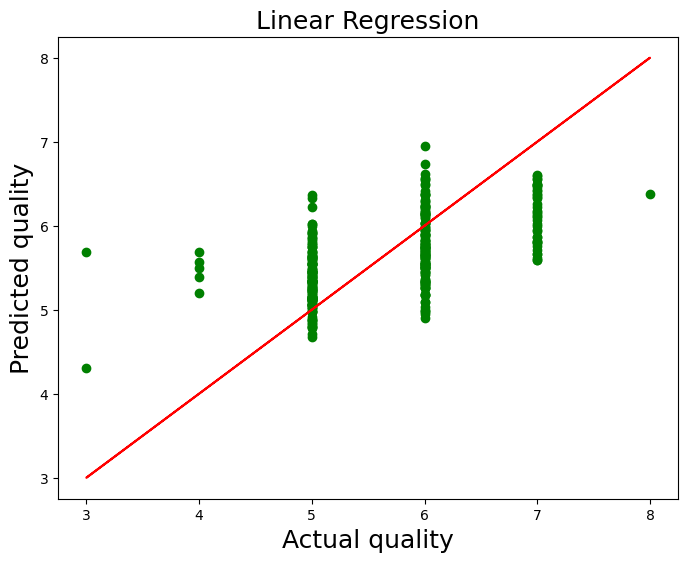

In [56]:
#finding out the linear regression 
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test, y=pred_test, color='g')
plt.plot(target_test, target_test, color='r')
plt.xlabel('Actual quality',fontsize=18)
plt.ylabel('Predicted quality',fontsize=18)
plt.title('Linear Regression',fontsize=18)
plt.show()


# Regularization

In [57]:
#regulatization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [58]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)

lss=r2_score(target_test,pred_ls)
lss

0.03188556093247241

In [59]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.0419944898180884

# Ensemble Technique

In [60]:
#using the ensemnle tehnique
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [61]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print('Cross val score:',rfc*100)

R2 Score: 45.71430346327069
Cross val score: 31.95502421653236


In [62]:
#OBSERVATION
#We are getting model accuracy as 45.65% and  cross validation score as 31.77%, 
#   this means our model is performing partially well.

# Conclusion

In [63]:
#importing pickle library to find the conculsion
import pickle
filename='quality.pkl'
pickle.dump(rf,open(filename,'wb'))

loaded_model=pickle.load(open('quality.pkl','rb'))
result=loaded_model.score(features_test,target_test)
print(result)

0.4571430346327069


In [64]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=["Predicted Red wine Quality","Original Red wine quality"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
Predicted Red wine Quality,5.5,5.6,5.74,5.03,5.66,5.3,5.32,5.45,5.44,6.62,...,5.42,5.27,5.04,4.78,6.11,5.01,6.33,6.52,5.7,5.69
Original Red wine quality,5.5,5.6,5.74,5.03,5.66,5.3,5.32,5.45,5.44,6.62,...,5.42,5.27,5.04,4.78,6.11,5.01,6.33,6.52,5.7,5.69
